<ipython-input-28-5a37f2d9d28a>:26: RuntimeWarning: overflow encountered in power
  errors = np.abs(X[:, 1] - predictions[:, 0]) ** 3
<ipython-input-28-5a37f2d9d28a>:45: RuntimeWarning: overflow encountered in power
  errors = np.abs(X - predictions) ** 7


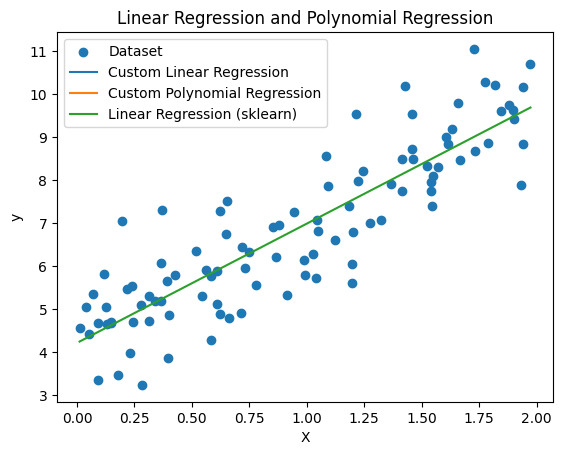

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


np.random.seed(42)

# Generate random data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Sort the data for plotting purposes
sorted_idx = np.argsort(X.flatten())
X_sorted = X[sorted_idx]
y_sorted = y[sorted_idx]

def custom_linear_regression(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)

    for epoch in range(epochs):
        predictions = X.dot(theta)
        errors = np.abs(X[:, 1] - predictions[:, 0]) ** 3
        gradient = -2/m * X.T.dot(errors[:, np.newaxis])
        theta -= learning_rate * gradient

    return theta


X_bias = np.c_[np.ones((100, 1)), X]

# Training custom linear regression model
theta_custom = custom_linear_regression(X_bias, y)

def custom_polynomial_regression(X, y, degree, learning_rate=0.01, epochs=1000):
    X_poly = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7]
    m, n = X_poly.shape
    theta = np.random.randn(n, 1)

    for epoch in range(epochs):
        predictions = X_poly.dot(theta)
        errors = np.abs(X - predictions) ** 7
        gradient = -2/m * X_poly.T.dot(errors)
        theta -= learning_rate * gradient

    return theta

# Train custom polynomial regression model
degree = 7
theta_custom_polynomial = custom_polynomial_regression(X, y, degree)


# Train linear regression model using sklearn
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Plot the dataset
plt.scatter(X, y, label='Dataset')

# Plot the custom linear regression model
plt.plot(X_sorted, X_bias[sorted_idx].dot(theta_custom), label='Custom Linear Regression', linestyle='-')

# Plot the custom polynomial regression model
X_poly_sorted = np.c_[X_sorted, X_sorted**2, X_sorted**3, X_sorted**4, X_sorted**5, X_sorted**6, X_sorted**7]
plt.plot(X_sorted, X_poly_sorted.dot(theta_custom_polynomial), label='Custom Polynomial Regression', linestyle='-')

# Plot the linear regression model using sklearn
plt.plot(X_sorted, lin_reg.predict(X_sorted), label='Linear Regression (sklearn)', linestyle='-')

plt.legend()
plt.title('Linear Regression and Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


<ipython-input-29-579db6145424>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Date'].fillna('', inplace=True)
<ipython-input-29-579db6145424>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Time'].fillna('', inplace=True)
<ipython-input-29-579db6145424>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['DateTime'] = df_selected.apply(la

Correlation Matrix:
                  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.773394  0.289975  0.812361       0.795578   
PT08.S1(CO)    0.773394     1.000000  0.278282  0.883795       0.892964   
NMHC(GT)       0.289975     0.278282  1.000000  0.281928       0.279761   
C6H6(GT)       0.812361     0.883795  0.281928  1.000000       0.981950   
PT08.S2(NMHC)  0.795578     0.892964  0.279761  0.981950       1.000000   
NOx(GT)        0.762273     0.615941  0.098180  0.616801       0.601773   
PT08.S3(NOx)  -0.613877    -0.771938 -0.261997 -0.735744      -0.796703   
NO2(GT)        0.646349     0.562843  0.156510  0.535919       0.561180   
PT08.S4(NO2)   0.558232     0.682881  0.232979  0.765731       0.777254   
PT08.S5(O3)    0.759027     0.899324  0.240592  0.865689       0.880578   
T              0.020257     0.048627  0.066782  0.198956       0.241373   
RH             0.043198     0.114606 -0.052784 -0.061681      -0.090380   
AH  

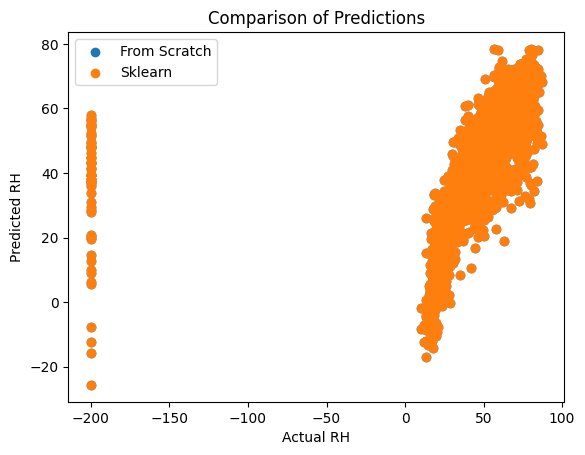

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from io import BytesIO
from zipfile import ZipFile
import requests

# Load the dataset from the ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"

# Download and extract the ZIP file
response = requests.get(url)
with ZipFile(BytesIO(response.content)) as zip_file:
    with zip_file.open('AirQualityUCI.csv') as csv_file:
        df = pd.read_csv(csv_file, delimiter=";", decimal=",")

# Extract only the necessary columns for further processing
selected_columns = ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
                     'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
                     'PT08.S5(O3)', 'T', 'RH', 'AH']

df_selected = df[selected_columns]

# Handle missing values in 'Date' and 'Time' columns
df_selected['Date'].fillna('', inplace=True)
df_selected['Time'].fillna('', inplace=True)

# Create 'DateTime' column using apply and lambda function
df_selected['DateTime'] = df_selected.apply(lambda row: pd.to_datetime(f"{row['Date']} {row['Time']}", errors='coerce', format='%d/%m/%Y %H.%M.%S'), axis=1)

# Fill missing 'DateTime' values with a placeholder datetime value
df_selected['DateTime'].fillna(pd.to_datetime('1900-01-01'), inplace=True)

# Convert 'DateTime' to datetime format
df_selected['DateTime'] = pd.to_datetime(df_selected['DateTime'], format='%d/%m/%Y %H.%M.%S')

# Drop 'Date' and 'Time' columns and handle missing values in numerical columns
df_numerical = df_selected.drop(['Date', 'Time', 'DateTime'], axis=1)
df_numerical.replace(-200, np.nan, inplace=True)

# Separate datetime column
datetime_col = df_selected['DateTime']

# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
df_numerical_imputed = pd.DataFrame(imputer.fit_transform(df_numerical), columns=df_numerical.columns)

# Combine datetime column with the imputed numerical columns
df_final = pd.concat([datetime_col.reset_index(drop=True), df_numerical_imputed, df['RH'].reset_index(drop=True)], axis=1)

# Explore the data and identify outliers
# Consider visualization and statistical methods for outlier detection

# Correlation matrix
correlation_matrix = df_final.corr()
print("Correlation Matrix:\n", correlation_matrix)


# Print column names of df_numerical
print("Columns of df_numerical:", df_numerical.columns)

# If df_imputed_array is a NumPy array, use the columns from df_numerical
# You can create a DataFrame from df_imputed_array and use its columns
# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
df_imputed_array = imputer.fit_transform(df_numerical)  # Impute and get a numpy array

# Create a DataFrame with the imputed values
df_imputed = pd.DataFrame(df_imputed_array, columns=df_numerical.columns, index=df_numerical.index)

# Print the columns of df_imputed
print("Columns of df_imputed:", df_imputed.columns)


df_final['RH'].replace(-200, np.nan, inplace=True)

# Split the data into training and testing sets
X = df_final.drop(['RH', 'DateTime'], axis=1)  # Features excluding RH and DateTime
y = df_final['RH'].astype(float)  # Convert 'RH' to float

# Handle missing values in the target variable 'y'
y.replace(np.nan, y.mean(), inplace=True)

# Split the data into training and testing sets with an 85:15 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


# Build and train a model (Random Forest Regressor as an example)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Train a Linear Regression model from scratch using numpy and pandas
X_train_np = np.c_[np.ones(X_train.shape[0]), X_train]  # Add a column of ones for the intercept term
theta = np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ y_train

# Train a Linear Regression model using sklearn
from sklearn.linear_model import LinearRegression

model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

# Predictions on the test set
X_test_np = np.c_[np.ones(X_test.shape[0]), X_test]  # Add a column of ones for the intercept term
y_pred_np = X_test_np @ theta
y_pred_sklearn = model_sklearn.predict(X_test)

# Calculate R2 score
from sklearn.metrics import r2_score

r2_np = r2_score(y_test, y_pred_np)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

# Print R2 scores
print("R2 Score (from scratch):", r2_np)
print("R2 Score (sklearn):", r2_sklearn)

# Plot the results
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_np, label='From Scratch')
plt.scatter(y_test, y_pred_sklearn, label='Sklearn')
plt.xlabel('Actual RH')
plt.ylabel('Predicted RH')
plt.legend()
plt.title('Comparison of Predictions')
plt.show()

